In [1]:
import numpy as np
from homography import pyrs12, spaces
import cv2, h5py, deproject, HandShapeAnalysis
import matplotlib.pyplot as plt

In [2]:
def plt_imsize(image,size=(20,20)):
    fig1 = plt.figure(figsize=size) # create a figure with the default size 
    ax1 = fig1.add_subplot(1,1,1) 
    ax1.imshow(image, interpolation='none')
    plt.show()

In [3]:
ls ../recording_data

1_move_down_not.hdf5   2_move_down_yes.hdf5   4_move_down_yes.hdf5
1_move_down_yes.hdf5   2_move_right_no.hdf5   4_move_left_yes.hdf5
1_move_right_not.hdf5  2_move_right_yes.hdf5  4_move_right_yes.hdf5
1_move_right_yes.hdf5  2_tap.hdf5             backup/
1_tap.hdf5             2_zoomin_yes.hdf5
2_move_down_no.hdf5    2_zoomout_yes.hdf5


In [4]:
one = h5py.File('../recording_data/1_move_right_not.hdf5', 'r')
org = one['pcl_center'][...]
mat = one['trans_matrix'][...]

In [5]:
analyser = HandShapeAnalysis.Depth2Finger(org, mat)
analyser.set_show(debug = True, finger_point_image = True, hull_image = True, detected_defect = True, cluster_point= True,  possibility_modal = False)

In [6]:
analyser.renew(one['depth'][13])

[[451 223]
 [353 147]
 [345 112]
 [351  80]
 [374  40]
 [403   0]
 [420  26]
 [443 112]
 [451 172]]
[ 28.37552186 179.16623254 175.04217479 160.26444165 104.53445508
 147.52880771 160.67187085 168.69006753 124.06463343]


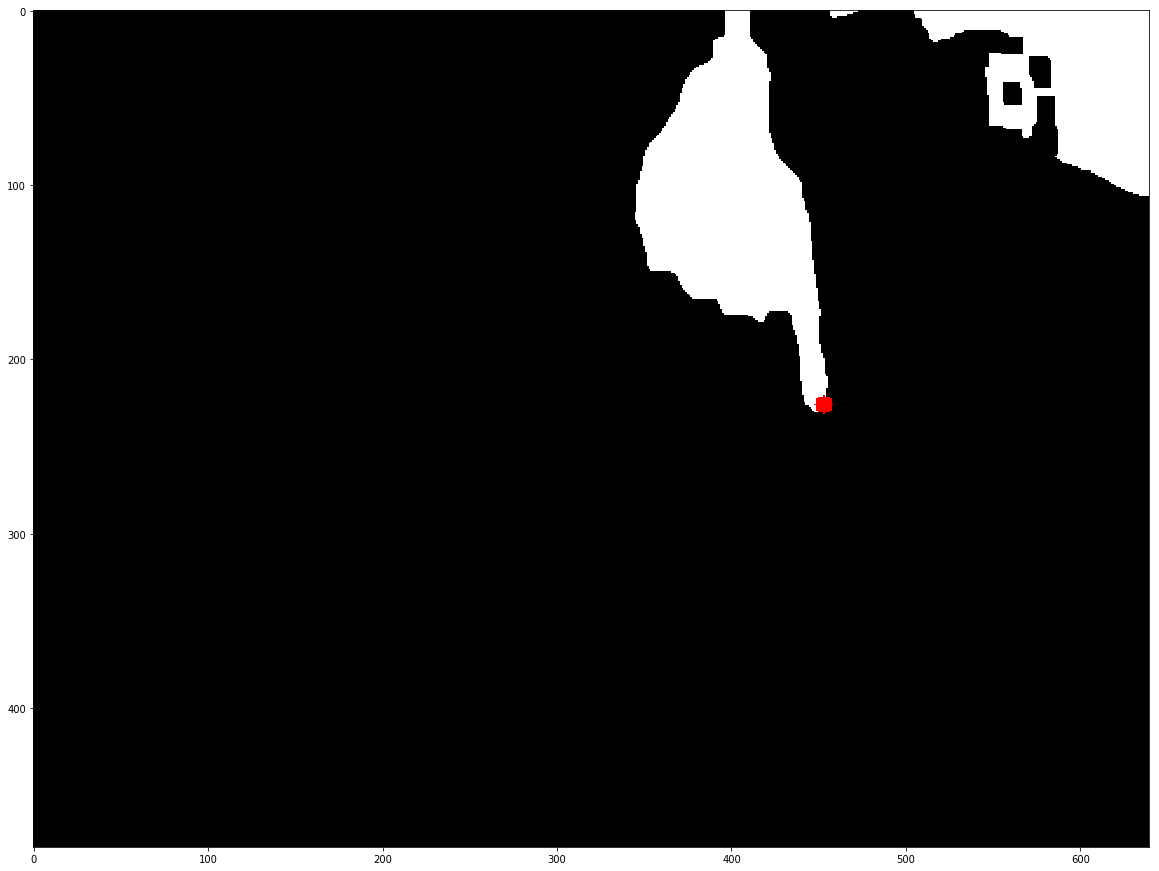

In [7]:
plt_imsize(analyser.finger_point_image)

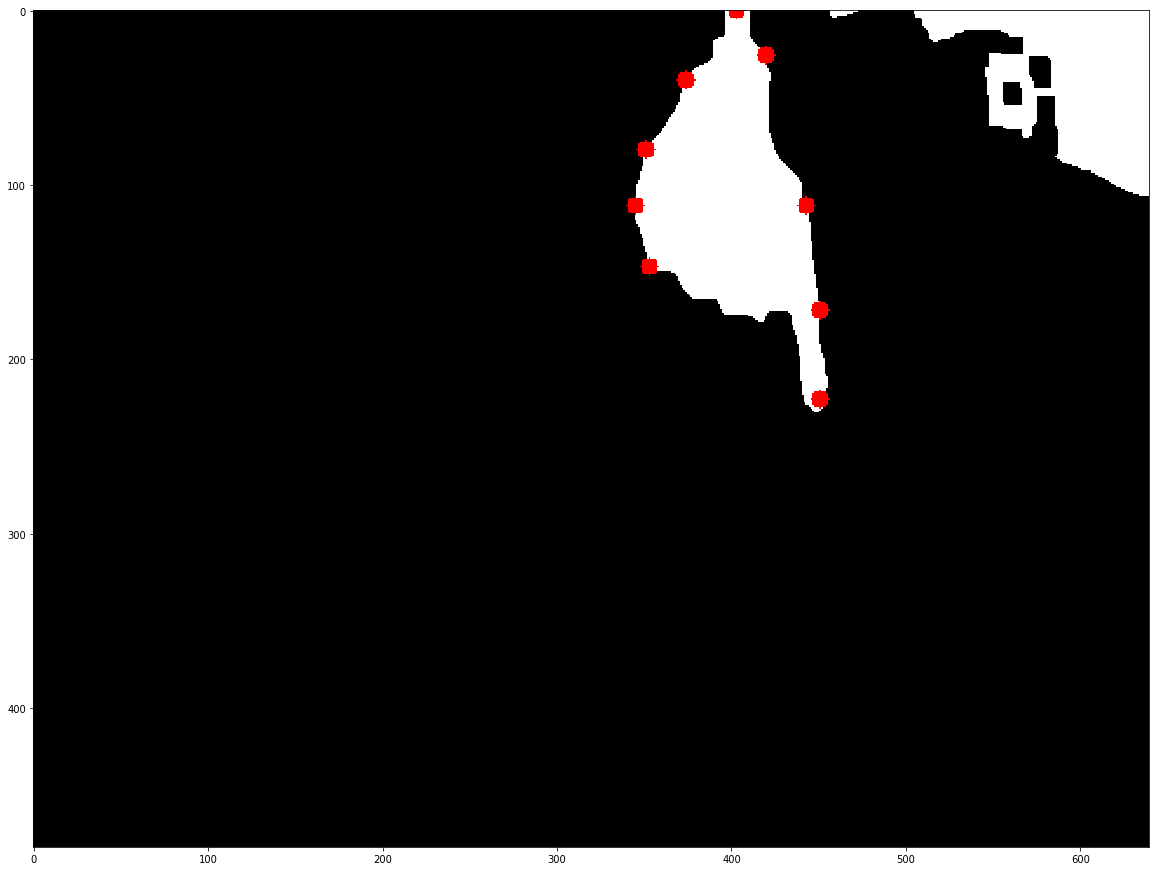

In [8]:
plt_imsize(analyser.cluster_point)

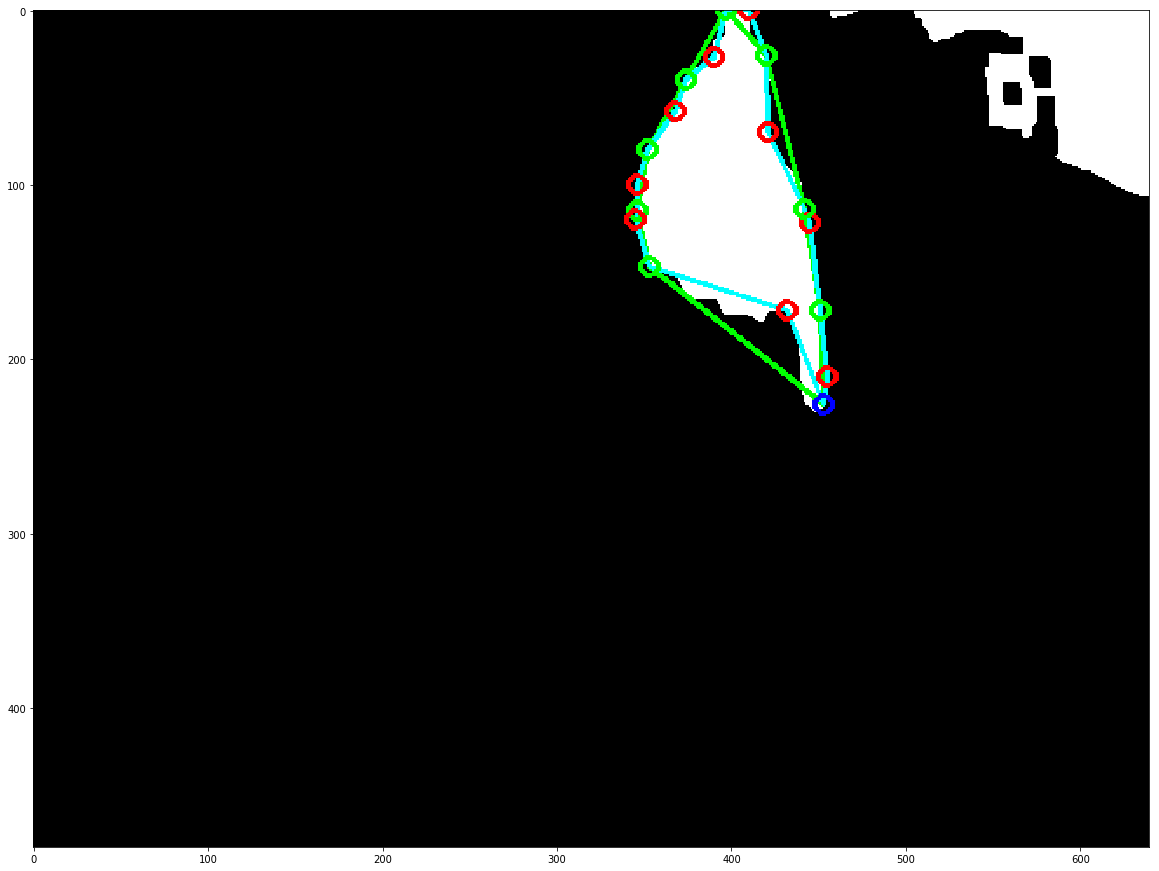

In [9]:
plt_imsize(analyser.detected_defect)

solution

In [11]:
cloest = []
for i in analyser.clusted_point:
    cloest.append(min(analyser.contours, key=lambda x: np.linalg.norm(i - x)))


In [12]:
np.asarray(cloest)

array([[[453, 226]],

       [[353, 147]],

       [[346, 115]],

       [[352,  80]],

       [[374,  40]],

       [[397,   0]],

       [[420,  26]],

       [[442, 114]],

       [[451, 172]]], dtype=int32)